In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

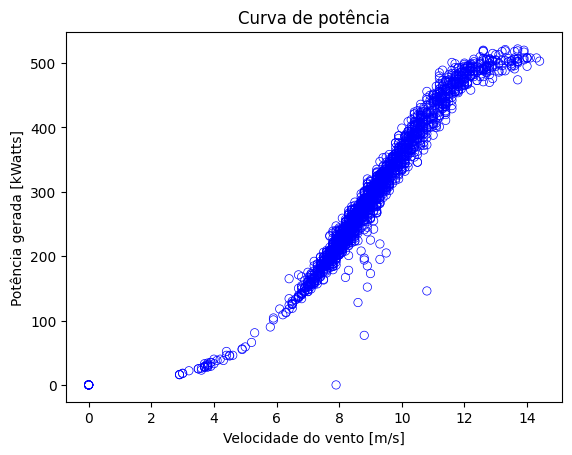

In [31]:
data = np.loadtxt('aerogerador.dat')

v_aero = data[:, 0]
P = data[:, 1]

# Cria o scatterplot
plt.scatter(v_aero, P, color='blue', marker='o', facecolors='none', edgecolors='blue', linewidths=0.5)

# Adiciona rótulos e título
plt.xlabel('Velocidade do vento [m/s]')
plt.ylabel('Potência gerada [kWatts]')
plt.title('Curva de potência')

# Exibe o gráfico
plt.show()

In [32]:
def r2(y, erro):
    ymed = np.mean(y)
    
    SEQ = np.sum(erro ** 2)
    Syy = np.sum((y-ymed) ** 2)
    return 1 - SEQ/Syy

def r2_ajustado(y, erro, n, p):
    ymed = np.mean(y)
    
    SEQ = np.sum(erro ** 2)
    Syy = np.sum((y-ymed) ** 2)
    return 1 - (SEQ / Syy) * ((n - 1) / (n - p - 1))

def aic(v, k, erro):
    SEQ = np.sum(erro ** 2)
    return (len(v) * np.log(SEQ)) + 2*k

Melhor posição: [ 6.62114281e-04 -9.06313651e-02  1.69671327e+00 -6.00000000e+00
  1.00000000e+01  4.69338754e+00]
Melhor aptidão: 659291.0418819023


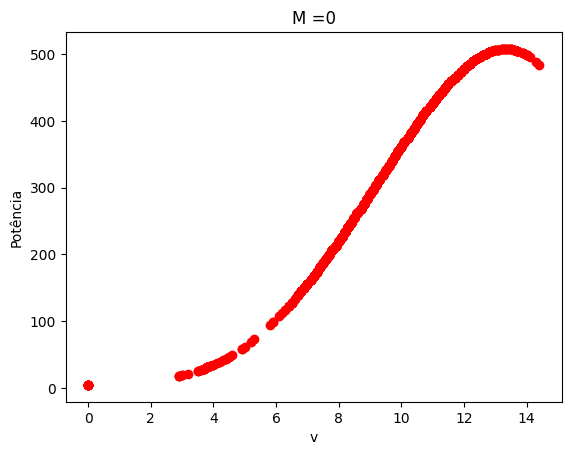

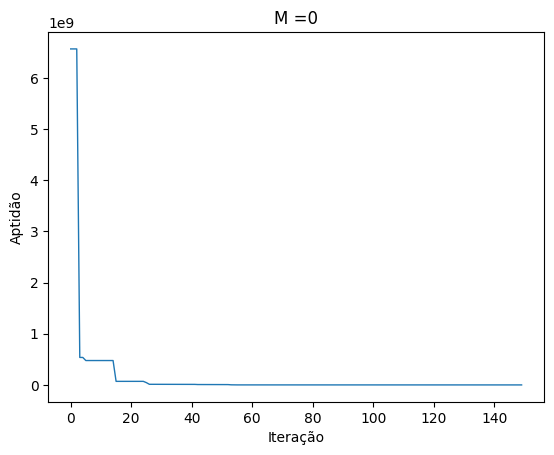

Melhor posição: [ 0.0386739  -0.80369296  3.46672771 10.         -6.         -5.07088007]
Melhor aptidão: 49456136.32926716


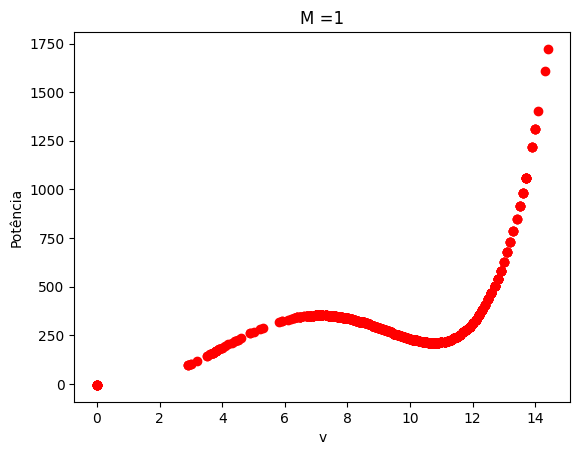

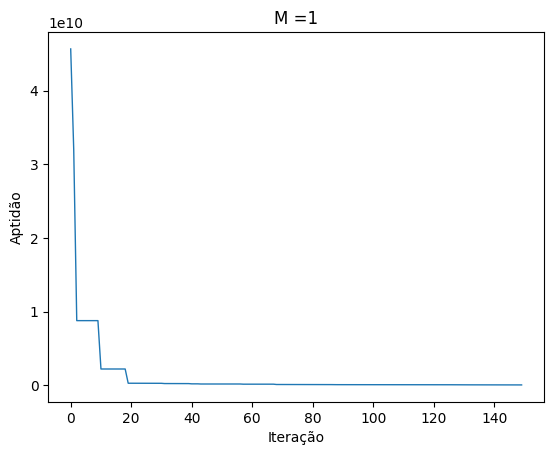

Melhor posição: [-0.01261281  0.19121744  0.15029761 -3.382807   -5.45745324 -1.50779015]
Melhor aptidão: 5959864.075472741


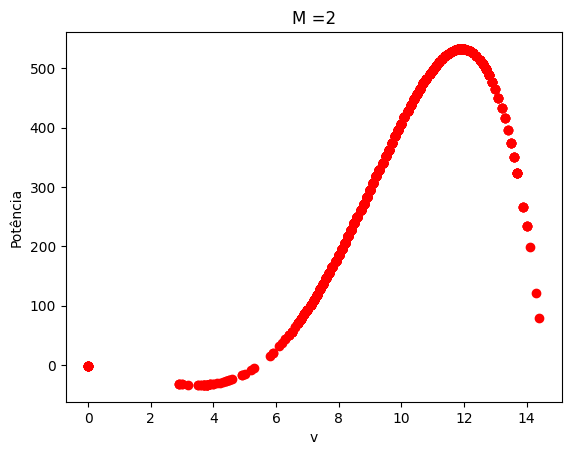

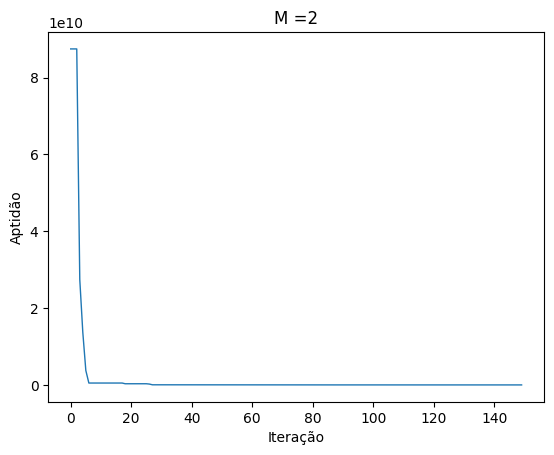

Melhor posição: [ 4.23877241e-03 -1.70285752e-01  2.00660585e+00 -3.35263403e+00
 -2.52613235e+00 -6.00000000e+00]
Melhor aptidão: 809365.0940150399


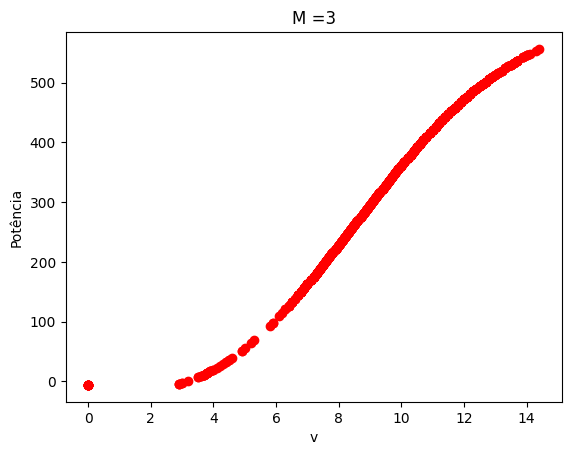

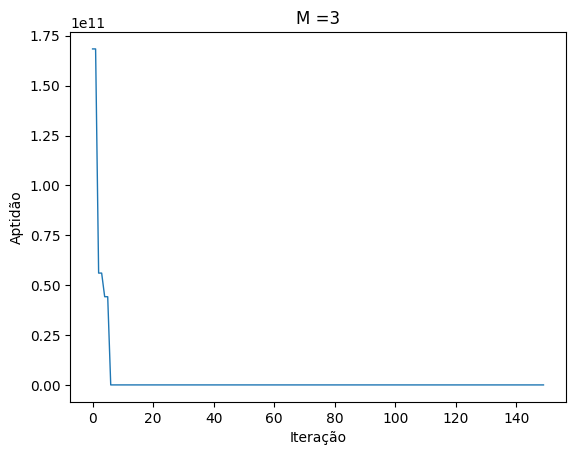

Melhor posição: [ 0.00942159 -0.30893676  3.13175707 -5.65602841 -6.         -4.28664157]
Melhor aptidão: 1171008.2325718869


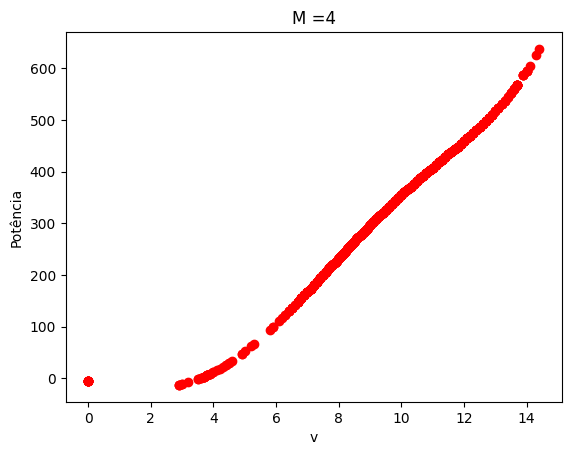

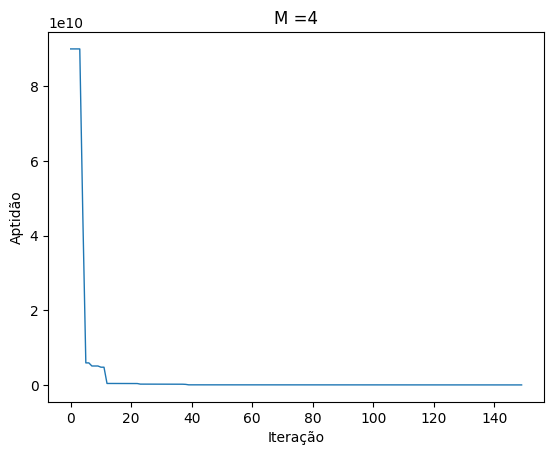

Melhor posição: [ 0.02976865 -0.66671016  3.82242464  0.38660892  9.15877904 -0.5895103 ]
Melhor aptidão: 26426442.980336823


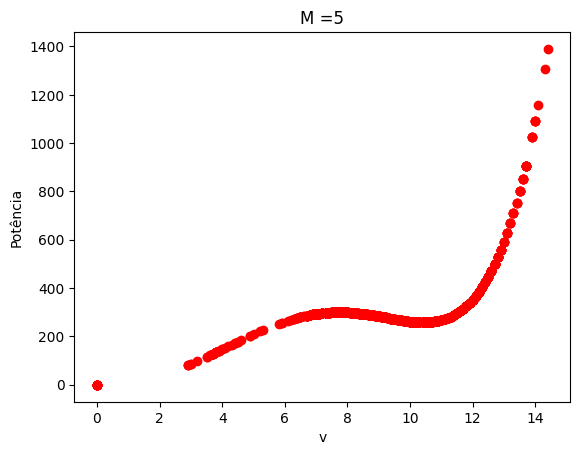

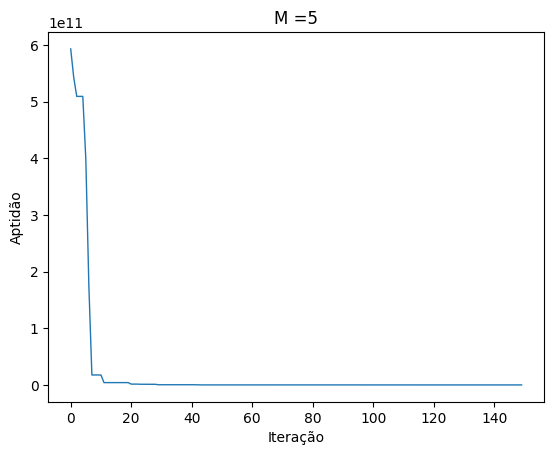

Melhor posição: [-0.03660938  0.86644258 -5.68901601 10.         10.         -6.        ]
Melhor aptidão: 13494508.217260245


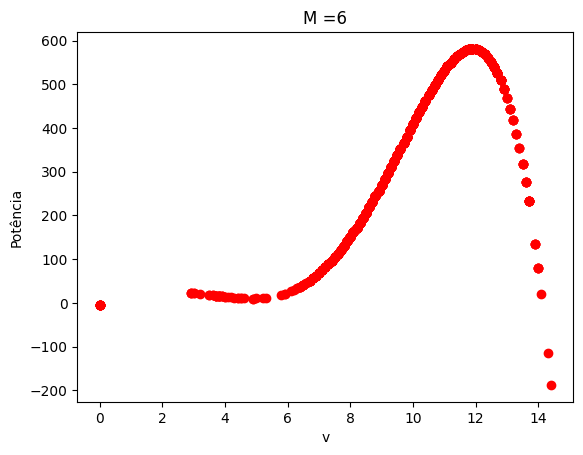

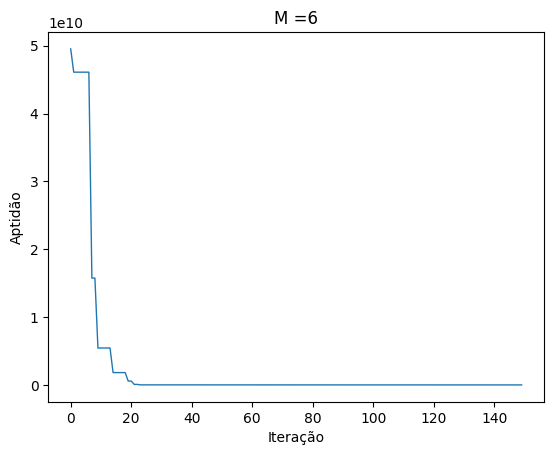

Melhor posição: [-0.03852475  0.9145195  -6.         10.         10.         10.        ]
Melhor aptidão: 14880416.460128656


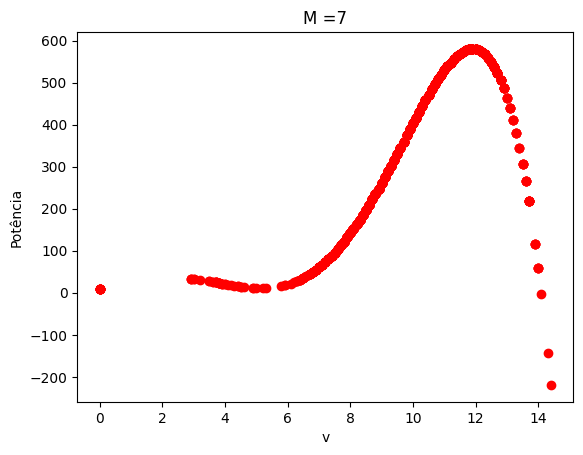

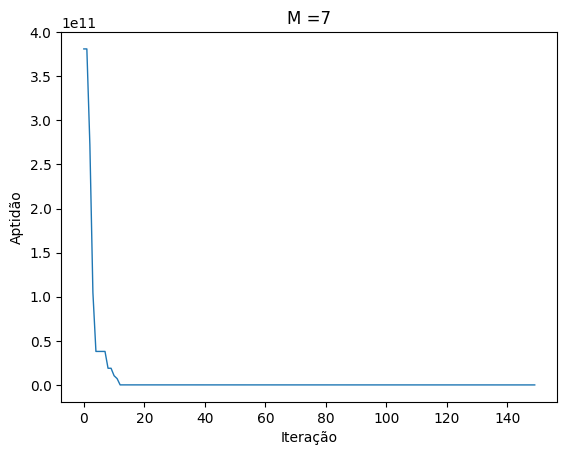

Melhor posição: [ 0.06663252 -1.57519581 10.         -6.         -6.         -6.        ]
Melhor aptidão: 84319454.87141186


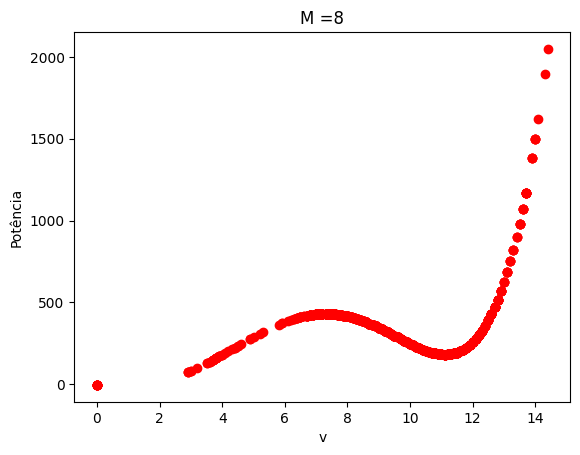

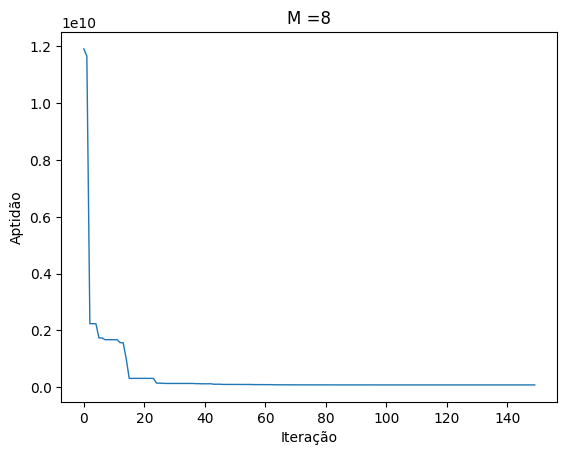

Melhor posição: [-5.84127898e-03  7.52190967e-02  2.96005316e-01 -3.46887047e-01
 -6.00000000e+00  6.51852712e+00]
Melhor aptidão: 1387845.780634683


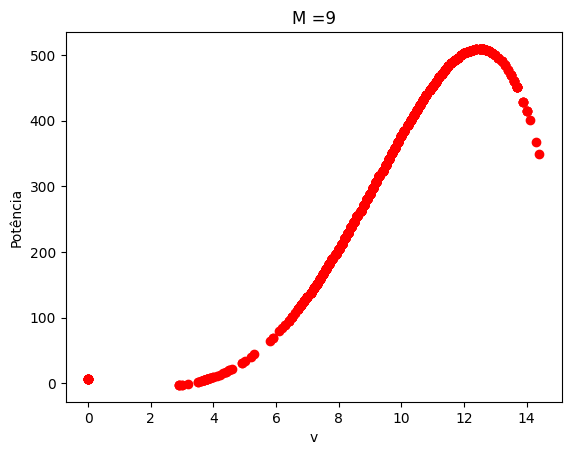

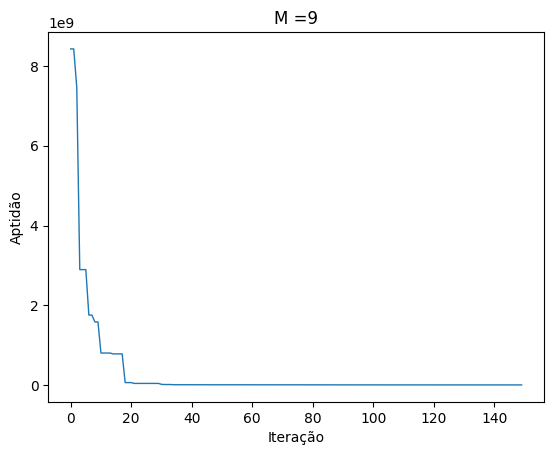

In [33]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import uniform

def pso_seq(b_aerogerador, v_aero, P):
    SEQ = []
    Ng = b_aerogerador.shape[0]
    for i in range(Ng):
        ypred = np.polyval(b_aerogerador[i, :], v_aero)
        y = P
        erro = y - ypred
        SEQ.append(np.sum(erro ** 2))
    F = SEQ
    return F

Ng = 150
Np = 80
c1 = 2.05
c2 = c1
w = 0.6
y = P
limites = [-6, 10]
k = 5
M = 10
data_values = []
coeficientes = []

for m in range(M):
    
    v = np.zeros((Np, 6))
    b_aerogerador = uniform.rvs(loc=limites[0], scale=limites[1] - limites[0], size=(Np, 6))
    
    b_best = b_aerogerador.copy()
    Fbest = pso_seq(b_best, v_aero, P)
    Fbest = np.array(Fbest)
    
    Fmin = np.min(Fbest)
    I = np.argmin(Fbest)
    g_best = b_best[I, :]
    
    aptidao = np.zeros(Ng)
    for t in range(Ng):
        iteracao = t
    
        Vcog = np.random.rand(Np, 6) * (b_best - b_aerogerador)
        Vsoc = np.random.rand(Np, 6) * (g_best - b_aerogerador)
    
        v = w * v + c1 * Vcog + c2 * Vsoc
        b_aerogerador = b_aerogerador + v
    
        b_aerogerador = np.clip(b_aerogerador, limites[0], limites[1])
    
        Fcand = pso_seq(b_aerogerador, v_aero, P)
        Fcand = np.array(Fcand)
        DF = np.array(Fcand) - np.array(Fbest)
        I_better = np.where(DF <= 0)[0]
        I_worse = np.where(DF > 0)[0]
    
        b_best[I_better] = b_aerogerador[I_better]
        Fbest[I_better] = Fcand[I_better]
    
        F_gbest = np.min(Fbest)
        I = np.argmin(Fbest)
        g_best = b_best[I, :]
    
        aptidao[t] = F_gbest

    ypred = np.polyval(g_best, v_aero)
    erro = y - ypred
    R2 = r2(y, erro)
    R2_ajustado = r2_ajustado(y, erro, len(y), k + 1)
    AIC = aic(v, k, erro)
    data_values.append((R2, R2_ajustado, AIC, m))
    coeficientes.append((g_best, m))
    
    print("Melhor posição:", g_best)
    print("Melhor aptidão:", F_gbest)
    
    ypred = np.polyval(g_best, v_aero)
    plt.figure()
    plt.plot(v_aero, ypred, 'ro')
    plt.xlabel('v')
    plt.ylabel('Potência')
    plt.title('M ={}'.format(m))
    
    plt.figure()
    plt.plot(aptidao, linewidth=1)
    plt.xlabel('Iteração')
    plt.ylabel('Aptidão')
    plt.title('M ={}'.format(m))
    
    plt.show()

In [34]:
# Cria o DataFrame com os valores de x, y e t e define os índices como os valores de k
data = pd.DataFrame(data_values, columns=['R2', 'R2_ajustado', 'AIC', 'M'], index=range(1, 11))
data

,R2,R2_ajustado,AIC,M
1,0.973650,0.973579,1081.913629,0
2,-0.976636,-0.981923,1427.327736,1
3,0.761799,0.761162,1258.044659,2
4,0.967652,0.967565,1098.320431,3
5,0.953198,0.953073,1127.870054,4
6,-0.056198,-0.059023,1377.190056,5
7,0.460659,0.459216,1323.423469,6
8,0.405268,0.403677,1331.244526,7
9,-2.370034,-2.379049,1470.009854,8
10,0.944531,0.944383,1141.461064,9


In [35]:
# Cria um novo DataFrame com os índices dos maiores e menores valores
new_data = {
    'maior_r2': data['R2'].idxmax(),
    'maior_r2_ajustado': data['R2_ajustado'].idxmax(),
    'menor_aic': data['AIC'].idxmin()
}

result_df = pd.DataFrame(new_data, index=[0])

result_df

,maior_r2,maior_r2_ajustado,menor_aic
0,1,1,1


In [36]:
# Cria o DataFrame com os valores de x, y e t e define os índices como os valores de k
coeficientes = pd.DataFrame(coeficientes, columns=['coeficientes', 'K'], index=range(1, 11))
coeficientes

,coeficientes,K
1,"[0.0006621142806372795, -0.0906313651092045, 1...",0
2,"[0.03867390106559684, -0.8036929606054208, 3.4...",1
3,"[-0.01261281399785659, 0.19121744196913723, 0....",2
4,"[0.004238772406740722, -0.17028575238767793, 2...",3
5,"[0.009421590780820359, -0.308936763601737, 3.1...",4
6,"[0.02976865246838831, -0.666710155000412, 3.82...",5
7,"[-0.03660937592157085, 0.8664425840435171, -5....",6
8,"[-0.03852475245669658, 0.9145194980345307, -6....",7
9,"[0.06663252152007886, -1.5751958060072935, 10....",8
10,"[-0.005841278982292678, 0.07521909673218892, 0...",9


In [39]:
coeficientes_m0 = coeficientes.loc[coeficientes['K'] == 0]['coeficientes'].values[0]
coeficientes_m0

array([ 6.62114281e-04, -9.06313651e-02,  1.69671327e+00, -6.00000000e+00,
        1.00000000e+01,  4.69338754e+00])

In [41]:
coeficientes_m3 = coeficientes.loc[coeficientes['K'] == 3]['coeficientes'].values[0]
coeficientes_m3

array([ 4.23877241e-03, -1.70285752e-01,  2.00660585e+00, -3.35263403e+00,
       -2.52613235e+00, -6.00000000e+00])

In [40]:
coeficientes_m4 = coeficientes.loc[coeficientes['K'] == 4]['coeficientes'].values[0]
coeficientes_m4

array([ 0.00942159, -0.30893676,  3.13175707, -5.65602841, -6.        ,
       -4.28664157])

In [38]:
# Calcule a norma euclidiana
norma = np.linalg.norm(coeficientes_k0)

print("Norma Euclidiana:", norma)

Norma Euclidiana: 12.685225144599185
